# Starting notebook SEN124A Project - Mississippi

You can use this notebook as a start for your network analysis with python/networkx

In [139]:
import numpy 
import math

In [140]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [141]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
mississippi_network = pd.read_excel('mississippi.xlsx')
# Show contents of the dataframe
mississippi_network

,weight,0,b
0,1,Washington,Oregon
1,1,Washington,California
2,1,California,Oregon
3,1,California,Nevada
4,1,California,Arizona
5,1,California,Texas
6,1,California,Indiana
7,1,Arizona,Texas
8,1,Texas,Louisiana
9,1,Texas,Florida


In [142]:
mississippi_network

,weight,0,b
0,1,Washington,Oregon
1,1,Washington,California
2,1,California,Oregon
3,1,California,Nevada
4,1,California,Arizona
5,1,California,Texas
6,1,California,Indiana
7,1,Arizona,Texas
8,1,Texas,Louisiana
9,1,Texas,Florida


In [143]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
mississippi_network = pd.read_excel('distance_state.xlsx')
# Show contents of the dataframe
mississippi_network

,weight,0,b,Distance
0,1,Washington,Oregon,160
1,1,Washington,California,693
2,1,California,Oregon,536
3,1,California,Nevada,130
4,1,California,Arizona,755
...,...,...,...,...
67,1,Wisconsin,Illinois,264
68,1,Illinois,Indiana,208
69,1,Michigan,Illinois,391
70,1,Ohio,Michigan,254


In [144]:
# Make a graph from the dataframe
Mississippi_Graph= nx.from_pandas_edgelist(mississippi_network, 0, 'b', edge_attr='Distance', create_using=nx.DiGraph() )
#Mississippi_Graph=nx.from_pandas_edgelist(mississippi_network, 0, 'b','Distance')
#Mississippi_Graph=nx.DiGraph()

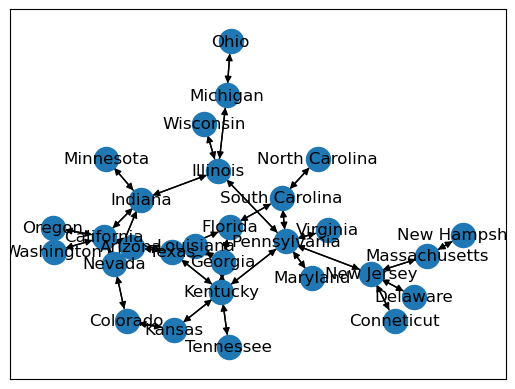

In [145]:
# Plot the graph
nx.draw_networkx(Mississippi_Graph, with_labels = True)

In [146]:
nx.shortest_path_length(Mississippi_Graph,'Michigan','Ohio','Distance')

254

In [147]:
#create a new node attribute "warehouse size"
whs = []
nx.set_node_attributes(Mississippi_Graph, whs, "warehouse size")

#Set the data per new node for the attribute "warehouse size"
Mississippi_Graph.nodes["Arizona"]["warehouse size"] = 3210500
Mississippi_Graph.nodes["California"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Colorado"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Delaware"]["warehouse size"] = 1000200
Mississippi_Graph.nodes["Florida"]["warehouse size"] = 4890000
Mississippi_Graph.nodes["Georgia"]["warehouse size"] = 1385000
Mississippi_Graph.nodes["Indiana"]["warehouse size"] = 5450000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 6012000
Mississippi_Graph.nodes["Kansas"]["warehouse size"] = 2120000
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 5145000
Mississippi_Graph.nodes["Maryland"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Massachusetts"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Michigan"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Minnesota"]["warehouse size"] = 820000
Mississippi_Graph.nodes["Nevada"]["warehouse size"] = 2150000
Mississippi_Graph.nodes["New Hampshire"]["warehouse size"] = 63800
Mississippi_Graph.nodes["New Jersey"]["warehouse size"] = 2260000
Mississippi_Graph.nodes["North Carolina"]["warehouse size"] = 397800
Mississippi_Graph.nodes["Ohio"]["warehouse size"] = 1855000
Mississippi_Graph.nodes["Oregon"]["warehouse size"] = 855000
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["South Carolina"]["warehouse size"] = 2340000
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 3680000
Mississippi_Graph.nodes["Texas"]["warehouse size"] = 8834000
Mississippi_Graph.nodes["Virginia"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Washington"]["warehouse size"] = 2280000
Mississippi_Graph.nodes["Wisconsin"]["warehouse size"] = 1100000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000

In [148]:
# Print the node names
Mississippi_Graph.nodes

NodeView(('Washington', 'Oregon', 'California', 'Nevada', 'Arizona', 'Texas', 'Indiana', 'Louisiana', 'Florida', 'Kentucky', 'Tennessee', 'Georgia', 'South Carolina', 'Kansas', 'Pennsylvania', 'North Carolina', 'Maryland', 'Virginia', 'New Jersey', 'Conneticut', 'Delaware', 'Massachusetts', 'New Hampshire', 'Colorado', 'Minnesota', 'Illinois', 'Wisconsin', 'Michigan', 'Ohio'))

In [149]:
b = pd.DataFrame.from_dict(dict(Mississippi_Graph.nodes(data=True)), orient='index')

In [150]:
# Return the warehouse size for state Arizona
Mississippi_Graph.nodes["Arizona"]["warehouse size"]

3210500

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

In [151]:
c = list(Mississippi_Graph.nodes)

In [152]:
#calculate the closeness centrality for every node in the graph
df = pd.DataFrame(columns=['State','Closeness_centrality'])
for i in c:
    a = nx.closeness_centrality(Mississippi_Graph,i,'Distance')
    new_row = {'State': i, 'Closeness_centrality': a}
    df = df.append(new_row, ignore_index=True)

C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18500\1033312818.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18500\1033312818.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18500\1033312818.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18500\1033312818.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Kelvi\AppDa

In [153]:
#sort the values to find the distribution center with the highest closeness centrality
df.sort_values(by=['Closeness_centrality'], ascending=False)

,State,Closeness_centrality
14,Pennsylvania,0.000814
9,Kentucky,0.000774
18,New Jersey,0.000760
16,Maryland,0.000748
20,Delaware,0.000703
17,Virginia,0.000694
19,Conneticut,0.000672
10,Tennessee,0.000669
12,South Carolina,0.000669
25,Illinois,0.000665


In [154]:
#shortest paths from Louisiana to all other distribution centers
b = nx.shortest_path_length(Mississippi_Graph,'Louisiana')
b

{'Louisiana': 0,
 'Texas': 1,
 'Georgia': 1,
 'Florida': 2,
 'California': 2,
 'Arizona': 2,
 'Kentucky': 2,
 'Pennsylvania': 3,
 'South Carolina': 3,
 'Oregon': 3,
 'Indiana': 3,
 'Washington': 3,
 'Kansas': 3,
 'Nevada': 3,
 'Tennessee': 3,
 'Maryland': 4,
 'Colorado': 4,
 'Illinois': 4,
 'North Carolina': 4,
 'New Jersey': 4,
 'Virginia': 4,
 'Minnesota': 4,
 'Wisconsin': 5,
 'Massachusetts': 5,
 'Michigan': 5,
 'Delaware': 5,
 'Conneticut': 5,
 'Ohio': 6,
 'New Hampshire': 6}

In [155]:
#average shortest path based on all shortest paths with source Louisiana
average_shortest_path = sum(b.values()) / len(b)
average_shortest_path

3.413793103448276

In [156]:
df1 = pd.DataFrame(columns=['State','Betweenness_centrality'])
d = nx.betweenness_centrality(Mississippi_Graph,weight='Distance')
for i in d:
    new_row = {'State': i, 'Betweenness_centrality': d[i]}
    df1 = df1.append(new_row, ignore_index=True)

C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18500\634800870.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18500\634800870.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18500\634800870.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18500\634800870.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
C:\Users\Kelvi\A

In [157]:
df1.sort_values(by=['Betweenness_centrality'], ascending=False)

,State,Betweenness_centrality
14,Pennsylvania,0.576720
9,Kentucky,0.404762
25,Illinois,0.298942
18,New Jersey,0.267196
2,California,0.174603
13,Kansas,0.174603
3,Nevada,0.171958
23,Colorado,0.129630
6,Indiana,0.124339
12,South Carolina,0.108466


In [158]:
mississippi_network.sort_values(by=[0], inplace=True)
mississippi_network

,weight,0,b,Distance
7,1,Arizona,Texas,1009
40,1,Arizona,California,755
2,1,California,Oregon,536
3,1,California,Nevada,130
4,1,California,Arizona,755
...,...,...,...,...
43,1,Texas,Arizona,1009
57,1,Virginia,Pennsylvania,220
1,1,Washington,California,693
0,1,Washington,Oregon,160


In [159]:
Arizona = 0
California = 0
Colorado = 0
Conneticut = 0
Delaware = 0
Florida = 0
Georgia = 0
Illinois = 0
Indiana = 0
Kansas = 0
Kentucky = 0
Louisiana = 0
Maryland = 0
Massachusetts = 0
Michigan = 0
Minnesota = 0
Nevada = 0
New_Hampshire = 0
New_Jersey = 0
North_Carolina = 0
Ohio = 0
Oregon = 0
Pennsylvania = 0
South_Carolina = 0
Tennessee = 0
Texas = 0
Virginia = 0
Washington = 0
Wisconsin = 0

for i in range(len(mississippi_network)):
    group = mississippi_network.iloc[i,1]
    if group == 'Arizona':
        Arizona = Arizona + mississippi_network.iloc[i,3]
    if group == 'California':
        California = California + mississippi_network.iloc[i,3]
    if group == 'Colorado':
        Colorado = Colorado + mississippi_network.iloc[i,3]
    if group == 'Conneticut':
        Conneticut = Conneticut + mississippi_network.iloc[i,3]
    if group == 'Delaware':
        Delaware = Delaware + mississippi_network.iloc[i,3]
    if group == 'Florida':
        Florida = Florida + mississippi_network.iloc[i,3]
    if group == 'Georgia':
        Georgia = Georgia + mississippi_network.iloc[i,3]
    if group == 'Illinois':
        Illinois = Illinois + mississippi_network.iloc[i,3]
    if group == 'Indiana':
        Indiana = Indiana + mississippi_network.iloc[i,3]
    if group == 'Kansas':
        Kansas = Kansas + mississippi_network.iloc[i,3]
    if group == 'Kentucky':
        Kentucky = Kentucky + mississippi_network.iloc[i,3]
    if group == 'Louisiana':
        Louisiana = Louisiana + mississippi_network.iloc[i,3]
    if group == 'Maryland':
        Maryland = Maryland + mississippi_network.iloc[i,3]
    if group == 'Massachusetts':
        Massachusetts = Massachusetts + mississippi_network.iloc[i,3]
    if group == 'Michigan':
        Michigan = Michigan + mississippi_network.iloc[i,3]
    if group == 'Minnesota':
        Minnesota = Minnesota + mississippi_network.iloc[i,3]
    if group == 'Nevada':
        Nevada = Nevada + mississippi_network.iloc[i,3]
    if group == 'New Hampshire':
        New_Hampshire = New_Hampshire + mississippi_network.iloc[i,3]
    if group == 'New Jersey':
        New_Jersey = New_Jersey + mississippi_network.iloc[i,3]
    if group == 'North Carolina':
        North_Carolina = North_Carolina + mississippi_network.iloc[i,3]
    if group == 'Ohio':
        Ohio = Ohio + mississippi_network.iloc[i,3]
    if group == 'Oregon':
        Oregon = Oregon + mississippi_network.iloc[i,3]
    if group == 'Pennsylvania':
        Pennsylvania = Pennsylvania + mississippi_network.iloc[i,3]
    if group == 'South Carolina':
        South_Carolina = South_Carolina + mississippi_network.iloc[i,3]
    if group == 'Tennessee':
        Tennessee = Tennessee + mississippi_network.iloc[i,3]
    if group == 'Texas':
        Texas = Texas + mississippi_network.iloc[i,3]
    if group == 'Virginia':
        Virginia = Virginia + mississippi_network.iloc[i,3]
    if group == 'Washington':
        Washington = Washington + mississippi_network.iloc[i,3]
    if group == 'Wisconsin':
        Wisconsin = Wisconsin + mississippi_network.iloc[i,3]
        
        
   

In [160]:
df2 = []
df3 = []
for i in range(len(mississippi_network)):
    group = mississippi_network.iloc[i,1]
    if group == 'Arizona':
        df2.append(mississippi_network.iloc[i,3]/Arizona)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Arizona))
    if group == 'California':
        df2.append(mississippi_network.iloc[i,3]/California)
        df3.append(math.log10(mississippi_network.iloc[i,3]/California))
    if group == 'Colorado':
        df2.append(mississippi_network.iloc[i,3]/Colorado)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Colorado))
    if group == 'Conneticut':
        df2.append(mississippi_network.iloc[i,3]/Conneticut)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Conneticut))
    if group == 'Delaware':
        df2.append(mississippi_network.iloc[i,3]/Delaware)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Delaware))
    if group == 'Florida':
        df2.append(mississippi_network.iloc[i,3]/Florida)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Florida))
    if group == 'Georgia':
        df2.append(mississippi_network.iloc[i,3]/Georgia)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Georgia))
    if group == 'Illinois':
        df2.append(mississippi_network.iloc[i,3]/Illinois)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Illinois))
    if group == 'Indiana':
        df2.append(mississippi_network.iloc[i,3]/Indiana)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Indiana))
    if group == 'Kansas':
        df2.append(mississippi_network.iloc[i,3]/Kansas)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Kansas))
    if group == 'Kentucky':
        df2.append(mississippi_network.iloc[i,3]/Kentucky)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Kentucky))
    if group == 'Louisiana':
        df2.append(mississippi_network.iloc[i,3]/Louisiana)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Louisiana))
    if group == 'Maryland':
        df2.append(mississippi_network.iloc[i,3]/Maryland)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Maryland))
    if group == 'Massachusetts':
        df2.append(mississippi_network.iloc[i,3]/Massachusetts)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Massachusetts))
    if group == 'Michigan':
        df2.append(mississippi_network.iloc[i,3]/Michigan)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Michigan))
    if group == 'Minnesota':
        df2.append(mississippi_network.iloc[i,3]/Minnesota)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Minnesota))
    if group == 'Nevada':
        df2.append(mississippi_network.iloc[i,3]/Nevada)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Nevada))
    if group == 'New Hampshire':
        df2.append(mississippi_network.iloc[i,3]/New_Hampshire)
        df3.append(math.log10(mississippi_network.iloc[i,3]/New_Hampshire))
    if group == 'New Jersey':
        df2.append(mississippi_network.iloc[i,3]/New_Jersey)
        df3.append(math.log10(mississippi_network.iloc[i,3]/New_Jersey))
    if group == 'North Carolina':
        df2.append(mississippi_network.iloc[i,3]/North_Carolina)
        df3.append(math.log10(mississippi_network.iloc[i,3]/North_Carolina))
    if group == 'Ohio':
        df2.append(mississippi_network.iloc[i,3]/Ohio)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Ohio))
    if group == 'Oregon':
        df2.append(mississippi_network.iloc[i,3]/Oregon)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Oregon))
    if group == 'Pennsylvania':
        df2.append(mississippi_network.iloc[i,3]/Pennsylvania)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Pennsylvania))
    if group == 'South Carolina':
        df2.append(mississippi_network.iloc[i,3]/South_Carolina)
        df3.append(math.log10(mississippi_network.iloc[i,3]/South_Carolina))
    if group == 'Tennessee':
        df2.append(mississippi_network.iloc[i,3]/Tennessee)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Tennessee))
    if group == 'Texas':
        df2.append(mississippi_network.iloc[i,3]/Texas)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Texas))
    if group == 'Virginia':
        df2.append(mississippi_network.iloc[i,3]/Virginia)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Virginia))
    if group == 'Washington':
        df2.append(mississippi_network.iloc[i,3]/Washington)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Washington))
    if group == 'Wisconsin':
        df2.append(mississippi_network.iloc[i,3]/Wisconsin)
        df3.append(math.log10(mississippi_network.iloc[i,3]/Wisconsin))

In [161]:
mississippi_network['pij'] = df2
mississippi_network['log_pij'] = df3

In [162]:
mississippi_network['pij*log_pij'] = mississippi_network['pij']*mississippi_network['log_pij']

In [163]:
mississippi_network

,weight,0,b,Distance,pij,log_pij,pij*log_pij
7,1,Arizona,Texas,1009,0.571995,-0.242607,-0.138770
40,1,Arizona,California,755,0.428005,-0.368552,-0.157742
2,1,California,Oregon,536,0.088332,-1.053881,-0.093092
3,1,California,Nevada,130,0.021424,-1.669102,-0.035759
4,1,California,Arizona,755,0.124423,-0.905099,-0.112615
...,...,...,...,...,...,...,...
43,1,Texas,Arizona,1009,0.196304,-0.707072,-0.138801
57,1,Virginia,Pennsylvania,220,1.000000,0.000000,0.000000
1,1,Washington,California,693,0.812427,-0.090216,-0.073294
0,1,Washington,Oregon,160,0.187573,-0.726829,-0.136334


In [164]:
df4 = pd.DataFrame(columns=['State'])
for i in c:
    new_row = {'State': i}
    df4 = df4.append(new_row, ignore_index=True)

C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18500\2292559206.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df4.append(new_row, ignore_index=True)
C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18500\2292559206.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df4.append(new_row, ignore_index=True)
C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18500\2292559206.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df4.append(new_row, ignore_index=True)
C:\Users\Kelvi\AppData\Local\Temp\ipykernel_18500\2292559206.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df4.append(new_row, ignore_index=True)
C:\Users\Kel

In [165]:
df4.sort_values(by=['State'], inplace=True)
df4

,State
4,Arizona
2,California
23,Colorado
19,Conneticut
20,Delaware
8,Florida
11,Georgia
25,Illinois
6,Indiana
13,Kansas


In [166]:
ArizonaArizona = 0
CaliforniaCalifornia = 0
ColoradoColorado = 0
ConneticutConneticut = 0
DelawareDelaware = 0
FloridaFlorida = 0
GeorgiaGeorgia = 0
IllinoisIllinois = 0
IndianaIndiana = 0
KansasKansas = 0
KentuckyKentucky = 0
LouisianaLouisiana = 0
MarylandMaryland = 0
MassachusettsMassachusetts = 0
MichiganMichigan = 0
MinnesotaMinnesota = 0
NevadaNevada = 0
New_HampshireNew_Hampshire = 0
New_JerseyNew_Jersey = 0
North_CarolinaNorth_Carolina = 0
OhioOhio = 0
OregonOregon = 0
PennsylvaniaPennsylvania = 0
South_CarolinaSouth_Carolina = 0
TennesseeTennessee = 0
TexasTexas = 0
VirginiaVirginia = 0
WashingtonWashington = 0
WisconsinWisconsin = 0

df5= []
for i in range(len(mississippi_network)):
    group = mississippi_network.iloc[i,1]
    if group == 'Arizona':
        ArizonaArizona = ArizonaArizona + mississippi_network.iloc[i,6]
    if group == 'CaliforniaCalifornia':
        CaliforniaCalifornia = CaliforniaCalifornia + mississippi_network.iloc[i,6]
    if group == 'Colorado':
        ColoradoColorado = ColoradoColorado + mississippi_network.iloc[i,6]
    if group == 'Conneticut':
        ConneticutConneticut = ConneticutConneticut + mississippi_network.iloc[i,6]
    if group == 'Delaware':
        DelawareDelaware = DelawareDelaware + mississippi_network.iloc[i,6]
    if group == 'Florida':
        FloridaFlorida = FloridaFlorida + mississippi_network.iloc[i,6]
    if group == 'Georgia':
        GeorgiaGeorgia = GeorgiaGeorgia + mississippi_network.iloc[i,6]
    if group == 'Illinois':
        IllinoisIllinois = IllinoisIllinois + mississippi_network.iloc[i,6]
    if group == 'Indiana':
        IndianaIndiana = IndianaIndiana + mississippi_network.iloc[i,6]
    if group == 'Kansas':
        KansasKansas = KansasKansas + mississippi_network.iloc[i,6]
    if group == 'Kentucky':
        KentuckyKentucky = KentuckyKentucky + mississippi_network.iloc[i,6]
    if group == 'Louisiana':
        LouisianaLouisiana = LouisianaLouisiana + mississippi_network.iloc[i,6]
    if group == 'Maryland':
        MarylandMaryland = MarylandMaryland + mississippi_network.iloc[i,6]
    if group == 'Massachusetts':
        MassachusettsMassachusetts = MassachusettsMassachusetts + mississippi_network.iloc[i,6]
    if group == 'Michigan':
        MichiganMichigan = MichiganMichigan + mississippi_network.iloc[i,6]
    if group == 'Minnesota':
        MinnesotaMinnesota = MinnesotaMinnesota + mississippi_network.iloc[i,6]
    if group == 'Nevada':
        NevadaNevada = NevadaNevada + mississippi_network.iloc[i,6]
    if group == 'New Hampshire':
        New_HampshireNew_Hampshire = New_HampshireNew_Hampshire + mississippi_network.iloc[i,6]
    if group == 'New Jersey':
        New_JerseyNew_Jersey = New_JerseyNew_Jersey + mississippi_network.iloc[i,6]
    if group == 'North Carolina':
        North_CarolinaNorth_Carolina = North_CarolinaNorth_Carolina + mississippi_network.iloc[i,6]
    if group == 'Ohio':
        OhioOhio = OhioOhio + mississippi_network.iloc[i,6]
    if group == 'Oregon':
        OregonOregon = OregonOregon + mississippi_network.iloc[i,6]
    if group == 'Pennsylvania':
        PennsylvaniaPennsylvania = PennsylvaniaPennsylvania + mississippi_network.iloc[i,6]
    if group == 'South Carolina':
        South_CarolinaSouth_Carolina = South_CarolinaSouth_Carolina + mississippi_network.iloc[i,6]
    if group == 'Tennessee':
        TennesseeTennessee = TennesseeTennessee + mississippi_network.iloc[i,6]
    if group == 'Texas':
        TexasTexas = TexasTexas + mississippi_network.iloc[i,6]
    if group == 'Virginia':
        VirginiaVirginia = VirginiaVirginia + mississippi_network.iloc[i,6]
    if group == 'Washington':
        WashingtonWashington = WashingtonWashington + mississippi_network.iloc[i,6]
    if group == 'Wisconsin':
        WisconsinWisconsin = WisconsinWisconsin + mississippi_network.iloc[i,6]

In [167]:
df5 = [ArizonaArizona,
CaliforniaCalifornia,
ColoradoColorado,
ConneticutConneticut,
DelawareDelaware,
FloridaFlorida,
GeorgiaGeorgia,
IllinoisIllinois,
IndianaIndiana,
KansasKansas,
KentuckyKentucky,
LouisianaLouisiana,
MarylandMaryland,
MassachusettsMassachusetts,
MichiganMichigan,
MinnesotaMinnesota,
NevadaNevada,
New_HampshireNew_Hampshire,
New_JerseyNew_Jersey,
North_CarolinaNorth_Carolina,
OhioOhio,
OregonOregon,
PennsylvaniaPennsylvania,
South_CarolinaSouth_Carolina,
TennesseeTennessee,
TexasTexas,
VirginiaVirginia,
WashingtonWashington,
WisconsinWisconsin,]

In [168]:
df4['summation_pij*log_pij'] = df5

In [169]:
df4['1-summation_pij*log_pij'] = 1 - df4['summation_pij*log_pij']


In [173]:
df5 = []
for i in range(len(df4)):
    group = df4.iloc[i,0]
    if group == 'Arizona':
        df5.append(df4.iloc[i,2]*a)
    if group == 'California':
        df5.append(df4.iloc[i,2]*California)
    if group == 'Colorado':
        df5.append(df4.iloc[i,2]*Colorado)
    if group == 'Conneticut':
        df5.append(df4.iloc[i,2]*Conneticut)
    if group == 'Delaware':
        df5.append(df4.iloc[i,2]*Delaware)
    if group == 'Florida':
        df5.append(df4.iloc[i,2]*Florida)
    if group == 'Georgia':
        df5.append(df4.iloc[i,2]*Georgia)
    if group == 'Illinois':
        df5.append(df4.iloc[i,2]*Illinois)
    if group == 'Indiana':
        df5.append(df4.iloc[i,2]*Indiana)
    if group == 'Kansas':
        df5.append(df4.iloc[i,2]*Kansas)
    if group == 'Kentucky':
        df5.append(df4.iloc[i,2]*Kentucky)
    if group == 'Louisiana':
        df5.append(df4.iloc[i,2]*Louisiana)
    if group == 'Maryland':
        df5.append(df4.iloc[i,2]*Maryland)
    if group == 'Massachusetts':
        df5.append(df4.iloc[i,2]*Massachusetts)
    if group == 'Michigan':
        df5.append(df4.iloc[i,2]*Michigan)
    if group == 'Minnesota':
        df5.append(df4.iloc[i,2]*Minnesota)
    if group == 'Nevada':
        df5.append(df4.iloc[i,2]*Nevada)
    if group == 'New Hampshire':
        df5.append(df4.iloc[i,2]*New_Hampshire)
    if group == 'New Jersey':
        df5.append(df4.iloc[i,2]*New_Jersey)
    if group == 'North Carolina':
        df5.append(df4.iloc[i,2]*North_Carolina)
    if group == 'Ohio':
        df5.append(df4.iloc[i,2]*Ohio)
    if group == 'Oregon':
        df5.append(df4.iloc[i,2]*Oregon)
    if group == 'Pennsylvania':
        df5.append(df4.iloc[i,2]*Pennsylvania)
    if group == 'South Carolina':
        df5.append(df4.iloc[i,2]*South_Carolina)
    if group == 'Tennessee':
        df5.append(df4.iloc[i,2]*Tennessee)
    if group == 'Texas':
        df5.append(df4.iloc[i,2]*Texas)
    if group == 'Virginia':
        df5.append(df4.iloc[i,2]*Virginia)
    if group == 'Washington':
        df5.append(df4.iloc[i,2]*Washington)
    if group == 'Wisconsin':
        df5.append(df4.iloc[i,2]*Wisconsin)

In [174]:
df4['Entropic_Degree'] = df5

In [175]:
df4

,State,summation_pij*log_pij,1-summation_pij*log_pij,Entropic_Degree
4,Arizona,-0.296512,1.296512,0.000618
2,California,0.000000,1.000000,6068.000000
23,Colorado,-0.281965,1.281965,1961.406416
19,Conneticut,0.000000,1.000000,180.000000
20,Delaware,0.000000,1.000000,112.000000
8,Florida,-0.416965,1.416965,2109.860532
11,Georgia,-0.460516,1.460516,1743.856568
25,Illinois,-0.547322,1.547322,2494.283836
6,Indiana,-0.481480,1.481480,7466.658887
13,Kansas,-0.299972,1.299972,1509.267693


In [176]:
df6 = [3210500, 14123800, 1000000, 14123800, 1000200, 4890000, 1385000, 5450000, 6012000, 2120000, 5145000, 50000000, 2300000,
      1000000, 1000000, 820000, 2150000, 63800, 2260000, 397800, 1855000, 855000, 8350000, 2340000, 3680000, 8834000,
      2300000, 2280000, 1100000]

In [177]:
df4['Warehouse_size'] = df6

In [190]:
df4['Demand_Adjusted_Entropic_Degree'] = (df4['Entropic_Degree'] / 2) * (1 + (df4['Warehouse_size'] / df4['Warehouse_size'].max(axis=0)))

In [191]:
df4

,State,summation_pij*log_pij,1-summation_pij*log_pij,Entropic_Degree,Warehouse_size,Demand_Adjusted_Entropic_Degree
4,Arizona,-0.296512,1.296512,0.000618,3210500,0.000329
2,California,0.000000,1.000000,6068.000000,14123800,3891.032184
23,Colorado,-0.281965,1.281965,1961.406416,1000000,1000.317272
19,Conneticut,0.000000,1.000000,180.000000,14123800,115.422840
20,Delaware,0.000000,1.000000,112.000000,1000200,57.120224
8,Florida,-0.416965,1.416965,2109.860532,4890000,1158.102446
11,Georgia,-0.460516,1.460516,1743.856568,1385000,896.080697
25,Illinois,-0.547322,1.547322,2494.283836,5450000,1383.080387
6,Indiana,-0.481480,1.481480,7466.658887,6012000,4182.224976
13,Kansas,-0.299972,1.299972,1509.267693,2120000,786.630322


In [195]:
df4.sort_values(by=['Demand_Adjusted_Entropic_Degree'], ascending=False, inplace=True)
df4

,State,summation_pij*log_pij,1-summation_pij*log_pij,Entropic_Degree,Warehouse_size,Demand_Adjusted_Entropic_Degree
5,Texas,-0.661031,1.661031,8537.698356,8834000,5023.069451
6,Indiana,-0.481480,1.481480,7466.658887,6012000,4182.224976
2,California,0.000000,1.000000,6068.000000,14123800,3891.032184
9,Kentucky,-0.645964,1.645964,4717.331700,5145000,2601.372566
14,Pennsylvania,-0.684936,1.684936,3942.749267,8350000,2300.594197
3,Nevada,-0.336872,1.336872,4245.905455,2150000,2214.239695
25,Illinois,-0.547322,1.547322,2494.283836,5450000,1383.080387
7,Louisiana,-0.298936,1.298936,1244.380678,50000000,1244.380678
8,Florida,-0.416965,1.416965,2109.860532,4890000,1158.102446
23,Colorado,-0.281965,1.281965,1961.406416,1000000,1000.317272
